# Figure 5e

The percentage of migration modes for different adhesion strength. 

# 1. Importing data

In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.4.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
res_folder = "12222021_formal5_hope_force_fpp_scan_calc5_cluster/"
geo_270_file = res_folder+"geo_270.csv"
geo_props_file = res_folder+"geo_props.csv"
scaled_geo_diff_fpp_force_file = res_folder+"geo_props.csv"

geo_270 = pd.read_csv(geo_270_file, index_col=0)
geo_props = pd.read_csv(geo_props_file, index_col=0)
scaled_geo_diff_fpp_force = pd.read_csv(scaled_geo_diff_fpp_force_file, index_col=0)

In [5]:
geo_270_half = geo_270.loc[geo_270.fpp_scan<501, :].reset_index(drop=True).copy()
geo_270_half.shape

(6050, 56)

In [6]:
force_list = sorted(geo_270_half["force_scan"].unique())
fpp_list = sorted(geo_270_half["fpp_scan"].unique())

In [7]:
force_list

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]

In [8]:
fpp_list

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# 2. Count different modes

In [9]:
def count_mode(df, mode):
    # for a df
    # count the number of the specified mode
    count = df[df.mode1==mode].shape[0]
    
    return count

In [10]:
# scan for adhesion strength
f = 210

# 1 - stay
# 2 - radial
# 3 - dir
mode1_list = []
mode2_list = []
mode3_list = []
    
for fpp in fpp_list:
    df_sub_f_fpp = geo_270_half.loc[(geo_270_half.force_scan==f)&(geo_270_half.fpp_scan==fpp)].copy()
    #print(df_sub_f_fpp.shape, f, fpp)
    ct1 = count_mode(df_sub_f_fpp, 1)
    ct2 = count_mode(df_sub_f_fpp, 2)    
    ct3 = count_mode(df_sub_f_fpp, 3)
    #print(ct1, ct2, ct3)
    
    mode1_list.append(ct1)
    mode2_list.append(ct2)        
    mode3_list.append(ct3)

In [11]:
mode1_list = np.array(mode1_list)/50.
mode2_list = np.array(mode2_list)/50.
mode3_list = np.array(mode3_list)/50.

In [12]:
mode1_list

array([0.02, 0.06, 0.42, 0.6 , 0.86, 0.82, 0.88, 0.88, 0.76, 0.74, 0.84])

In [13]:
mode2_list

array([0.98, 0.94, 0.52, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [14]:
mode3_list

array([0.  , 0.  , 0.06, 0.3 , 0.14, 0.18, 0.12, 0.12, 0.24, 0.26, 0.16])

# 3. Draw the figure

In [15]:
from matplotlib import rcParams
rcParams['axes.labelpad'] = 12

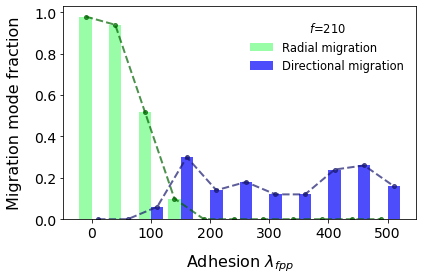

In [28]:
# bar plot
x = np.arange(len(mode1_list))  # the label locations
width = 0.42  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mode2_list, width, color = colors[1], label='Radial migration')
rects2 = ax.bar(x + width/2, mode3_list, width, color = colors[0], label='Directional migration')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Migration mode fraction')
#ax.set_title('')
ax.set_xticks(x[::2])
ax.set_xticklabels(fpp_list[::2])

ax.plot(x-width/2., mode2_list,"--.", alpha = 0.7,
        color = "darkgreen", lw = 2, markersize =8,
        zorder=2)

ax.plot(x+width/2., mode3_list,"--.", alpha = 0.7,
        color = "midnightblue", lw = 2, markersize =8,
        zorder=2)

plt.legend(fontsize = 11.5,
           title=r"$f$=210",title_fontsize=11.5,
           edgecolor="white", bbox_to_anchor=(0.5,0.98)
          )

ax.tick_params(axis='x', labelsize=14)  # only affects
ax.tick_params(axis='y', labelsize=14)  # tick labels

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.xlabel(r"Adhesion $\lambda_{fpp}$", fontsize = 16)
plt.ylabel("Migration mode fraction", fontsize = 16)

fig.tight_layout()
plt.savefig(res_folder+"04262022_modes_vs_adhesion_hist"+".pdf", dpi = 200, bbox_inches = "tight")
plt.show()